<a href="https://colab.research.google.com/github/KayalvizhiT513/Sine-Interpolation/blob/main/Adaptive_Sine_Function_Approximation_for_Tolerance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import matplotlib.pyplot as plt

In [35]:
import numpy as np

# Generate theta and calculate y = sin(theta)
def generate_theta(num_elements):
    theta = np.linspace(0, np.pi/2, num_elements)
    return theta

def calculate_sin(theta):
    y = np.sin(theta)
    return y

# Calculate second derivative using central difference
def central_difference_second_derivative(y, theta, h):
    y_double_prime = np.zeros_like(y)

    for i in range(1, len(y) - 1):
        y_double_prime[i] = (y[i+1] - 2*y[i] + y[i-1]) / h**2

    return y_double_prime

# Calculate midpoints and errors
def calculate_midpoints_and_errors(theta, y):
    midpoints = (theta[:-1] + theta[1:]) / 2
    interpolated_y = y[:-1] + (y[1:] - y[:-1]) / (theta[1:] - theta[:-1]) * (midpoints - theta[:-1])
    actual_y = np.sin(midpoints)
    errors = np.abs(actual_y - interpolated_y)

    # Find the index of the maximum error
    max_error_index = np.argmax(errors)
    max_error = errors[max_error_index]

    # Find the corresponding theta pair
    theta_pairs = [(theta[i], theta[i+1]) for i in range(len(theta) - 1)]
    max_error_theta_pair = theta_pairs[max_error_index]

    return max_error, errors, max_error_theta_pair


# Main function to adjust num_elements based on tolerance with adaptive step size
def optimize_elements(tolerance):
    num_elements = 10  # Initial guess for number of elements
    max_iterations = 100  # Max number of iterations to avoid infinite loop
    iteration = 0

    while iteration < max_iterations:
        theta = generate_theta(num_elements)
        y = calculate_sin(theta)

        # Calculate the second derivative
        y_double_prime = central_difference_second_derivative(y, theta, theta[1] - theta[0])

        # Calculate errors and get the max error
        max_error, errors, max_error_theta_pair = calculate_midpoints_and_errors(theta, y)

        # Adaptive step size calculation
        error_ratio = max_error / tolerance

        if max_error > tolerance:
            # Increase num_elements based on how large the error is compared to the tolerance
            step_size = int(num_elements * error_ratio * 0.5)  # Adjust the scaling factor as needed
            num_elements += max(1, step_size)  # Ensure at least 1 element is added
        elif max_error < tolerance * 0.5:
            # Decrease num_elements based on how far below the tolerance the error is
            step_size = int(num_elements * (1 - error_ratio) * 0.5)  # Adjust scaling factor
            num_elements -= max(1, step_size)  # Ensure at least 1 element is subtracted
        else:
            # If within acceptable tolerance, break
            break

        # Avoid going below 5 elements
        if num_elements < 5:
            num_elements = 5
            break

        iteration += 1  # Increment iteration count

    if iteration == max_iterations:
        print("Max iterations reached. The solution may not have converged.")

    # Once converged, find the max absolute second derivative
    max_second_derivative = np.max(np.abs(y_double_prime))
    corresponding_angle = theta[np.argmax(np.abs(y_double_prime))]

    # Print results
    print(f"For num_elements = {num_elements}:")
    print(f"Max error = {max_error:.6f}, between = {max_error_theta_pair}")
    print(f"Max second derivative = {max_second_derivative:.6f} at theta = {corresponding_angle:.4f}")

    return num_elements, max_error, max_second_derivative, y_double_prime, corresponding_angle


In [36]:
def refine_theta_based_on_second_derivative_and_tolerance(theta, y, max_second_derivative_original, tolerance):
    new_theta = np.copy(theta)  # Create a copy of theta to modify
    new_y = np.copy(y)          # Copy y as well for calculations
    h = theta[1] - theta[0]

    for i in range(1, len(new_theta) - 1):  # Iterate from 1 to len(new_theta) - 2
        # Temporarily remove the element at index i
        if(i >= len(new_theta)):
            break
        temp_theta = np.delete(new_theta, i)
        temp_y = np.sin(temp_theta)

        # Calculate the second derivative for the modified theta
        y_double_prime = non_uniform_central_difference_second_derivative(temp_y, temp_theta)
        max_error, errors, max_error_theta_pair = calculate_midpoints_and_errors(temp_theta, temp_y)

        # Find the max absolute second derivative in the updated array
        max_second_derivative = np.max(np.abs(y_double_prime))

        # Compare with the original max second derivative
        if max_second_derivative <= max_second_derivative_original:
            # Keep the element removed if the new max second derivative and new max error is smaller
            if max_error <= tolerance:
              new_theta = temp_theta  # Update new_theta permanently
              new_y = temp_y          # Update new_y permanently
        else:
            # If the new max is larger, restore the removed element by skipping to next
            continue

    return new_theta, new_y


In [37]:
def non_uniform_central_difference_second_derivative(y, theta):
    y_double_prime = np.zeros_like(y)

    for i in range(1, len(y) - 1):
        h1 = theta[i] - theta[i-1]  # Spacing between theta[i] and theta[i-1]
        h2 = theta[i+1] - theta[i]  # Spacing between theta[i+1] and theta[i]

        # Second derivative using non-uniform central difference formula
        y_double_prime[i] = (2 / (h1 + h2)) * ((y[i+1] - y[i]) / h2 - (y[i] - y[i-1]) / h1)

    return y_double_prime

In [53]:
# Get tolerance from user and run the optimization
tolerance = 0.0005  # float(input("Enter the tolerance value: "))

# Example usage after running optimize_elements
num_elements, max_error, max_second_derivative_original, y_double_prime, corresponding_angle = optimize_elements(tolerance)
theta = generate_theta(num_elements)
y = calculate_sin(theta)

# Refine theta based on second derivative
new_theta, new_y = refine_theta_based_on_second_derivative_and_tolerance(theta, y, max_second_derivative_original, tolerance)
new_theta, new_y, len(new_theta)

For num_elements = 31:
Max error = 0.000343, between = (1.5184364492350666, 1.5707963267948966)
Max second derivative = 0.998401 at theta = 1.5184


(array([0.        , 0.10471976, 0.20943951, 0.31415927, 0.41887902,
        0.4712389 , 0.52359878, 0.57595865, 0.62831853, 0.68067841,
        0.73303829, 0.78539816, 0.83775804, 0.89011792, 0.9424778 ,
        0.99483767, 1.04719755, 1.09955743, 1.15191731, 1.20427718,
        1.25663706, 1.30899694, 1.36135682, 1.41371669, 1.46607657,
        1.51843645]),
 array([0.        , 0.10452846, 0.20791169, 0.30901699, 0.40673664,
        0.4539905 , 0.5       , 0.54463904, 0.58778525, 0.62932039,
        0.66913061, 0.70710678, 0.74314483, 0.77714596, 0.80901699,
        0.83867057, 0.8660254 , 0.89100652, 0.91354546, 0.93358043,
        0.95105652, 0.96592583, 0.9781476 , 0.98768834, 0.9945219 ,
        0.99862953]),
 26)

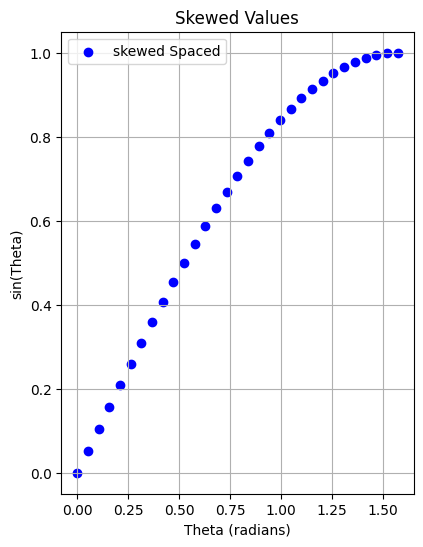

In [54]:
# Create the figure and axis
plt.figure(figsize=(10, 6))

# Plot equally spaced values
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(theta, y, color='blue', label='skewed Spaced')
plt.title('Skewed Values')
plt.xlabel('Theta (radians)')
plt.ylabel('sin(Theta)')
plt.grid()
plt.legend()

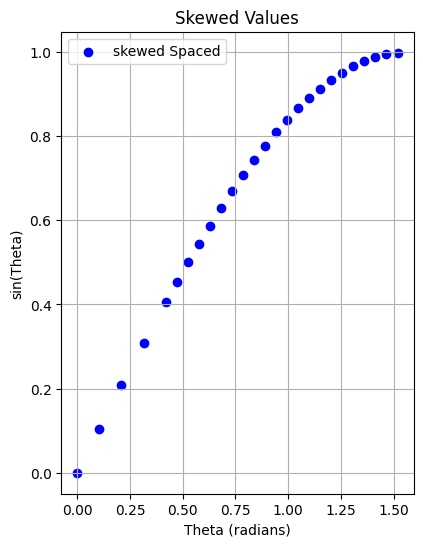

In [55]:
# Create the figure and axis
plt.figure(figsize=(10, 6))

# Plot equally spaced values
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(new_theta, new_y, color='blue', label='skewed Spaced')
plt.title('Skewed Values')
plt.xlabel('Theta (radians)')
plt.ylabel('sin(Theta)')
plt.grid()
plt.legend()